In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir('BayesHI')
import bayeshi

In [2]:
model = bayeshi.load_model('LSTMSequenceToSequence')

In [3]:
train_loader, val_loader, test_loader = bayeshi.load_tigress_abs_data(sim_number = '300')

Loading data for simulation 300
Removed 0 lines of sight with NaNs
Splitting data into train, validation, and test sets with sizes: train=60%, val=20%, test=20%


Loading model from /home/120/em8117/lstm_abs.pth
Model loaded successfully
Training Model
Initial learning rate: [0.001]
Epoch 1: 100%|██████████| 3360/3360 [00:25<00:00, 129.63batch/s]
Epoch [1/50], Train Loss: 0.0020, Validation Loss: 0.0024, took 29.52s
Epoch 2: 100%|██████████| 3360/3360 [00:25<00:00, 129.57batch/s]
Epoch [2/50], Train Loss: 0.0020, Validation Loss: 0.0024, took 29.51s
Epoch 3: 100%|██████████| 3360/3360 [00:25<00:00, 129.65batch/s]
Epoch [3/50], Train Loss: 0.0021, Validation Loss: 0.0024, took 29.52s
Epoch 4: 100%|██████████| 3360/3360 [00:25<00:00, 129.81batch/s]
Epoch [4/50], Train Loss: 0.0020, Validation Loss: 0.0024, took 29.46s
Epoch 5: 100%|██████████| 3360/3360 [00:25<00:00, 130.07batch/s]
Epoch [5/50], Train Loss: 0.0020, Validation Loss: 0.0023, took 29.41s
Epoch 6: 100%|██████████| 3360/3360 [00:25<00:00, 129.75batch/s]
Epoch [6/50], Train Loss: 0.0020, Validation Loss: 0.0023, took 29.48s
Epoch 7: 100%|██████████| 3360/3360 [00:25<00:00, 129.73batch/s

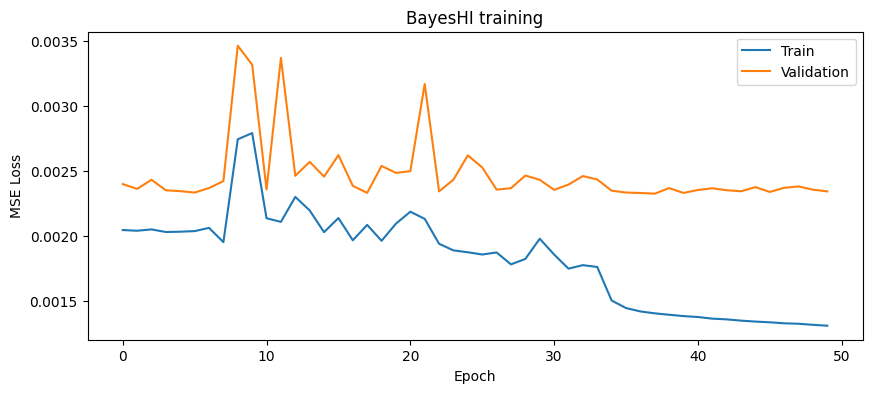

In [27]:
# Total of 200

if os.path.exists('/home/120/em8117/lstm_abs.pth'):
    model.load_weights('/home/120/em8117/lstm_abs.pth')
# else:
    train_errors, val_errors, *_ = model.fit(train_loader, val_loader, '/home/120/em8117/lstm_abs.pth', nEpochs=50)
    plt.figure(figsize=(10,4))
    plt.plot(train_errors, label='Train')
    plt.plot(val_errors, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.title(f'BayesHI training')
    plt.show()

In [28]:
# Predict on test set
predictions = model.predict(test_loader).cpu().numpy()

In [29]:
x_test = np.array([x[0] for x in test_loader]).reshape(-1,256)
y_test = np.array([x[1] for x in test_loader]).reshape(-1,256)

In [50]:
def hiep_plot(index):
    vch_em = np.linspace(-70,70, 256)
    
    ## Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8), sharex=True)
    
    ## Emission
    ax1.plot(vch_em, x_test[index], 'k-', label=r'$T_{b}$ (kh)')
    
    # ax1.set_title('', fontsize = 35)
    
    ax1.set_ylabel('$T_{b} [K]$', fontsize = 35)
    ax1.tick_params(axis='x', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    # ax1.set_xlim(vlim1, vlim2)
    ax1.legend(loc='upper left', fontsize=12)
    ax1.grid(True, linestyle='--', linewidth=0.5, color='lightgray', zorder=-10)
    
    
    ## Absorption
    ax2.plot(vch_em, np.exp(-y_test[index]), 'k-', label='True')
    ax2.plot(vch_em, np.exp(-predictions[index]), 'r-', label='Predicted')
    
    ax2.set_ylabel(r'$e^{-\tau}$', fontsize = 35)
    ax2.set_xlabel('Vel [km/s]', fontsize = 35)
    ax2.tick_params(axis='x', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)
    # ax2.set_xlim(vlim1, vlim2)
    ax2.legend(loc='lower left', fontsize=12)
    
    ax2.grid(True, linestyle='--', linewidth=0.5, color='lightgray', zorder=-10)
    
    
    plt.subplots_adjust(left=None,
                        bottom=None,
                        right=None,
                        top=None,
                        wspace=0.15,
                        hspace=0.005
                        )
    
    # plt.savefig(src + '.png', bbox_inches='tight', pad_inches=0.09, format='png', dpi=150)
    
    plt.show()
    plt.close(fig)

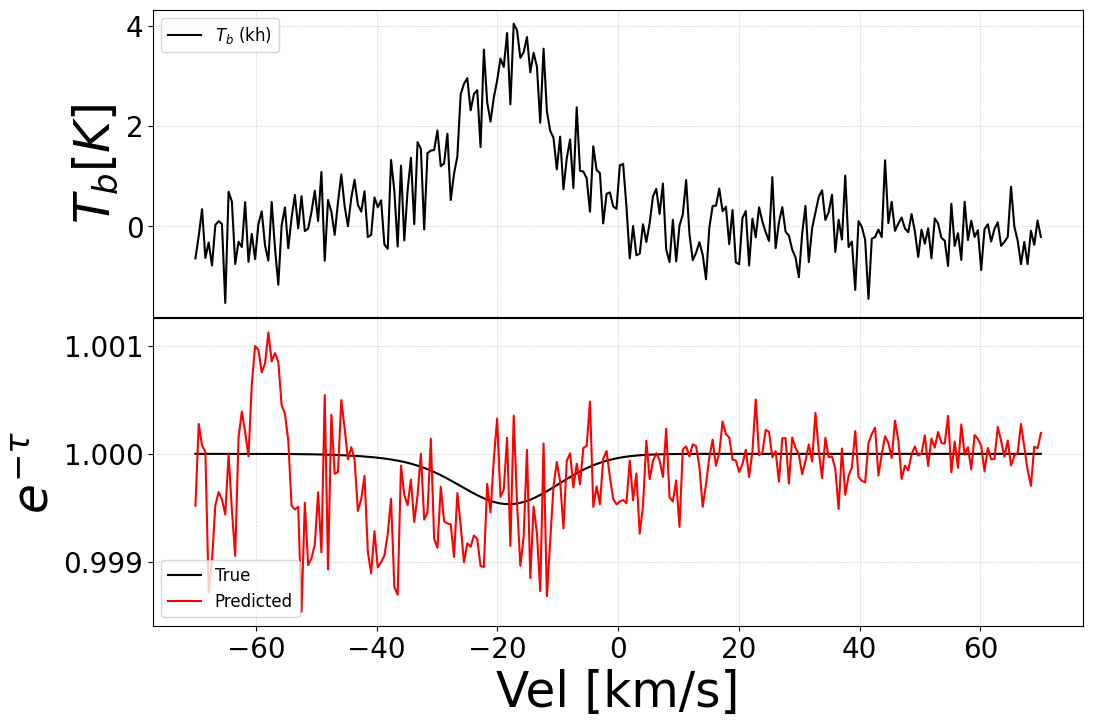

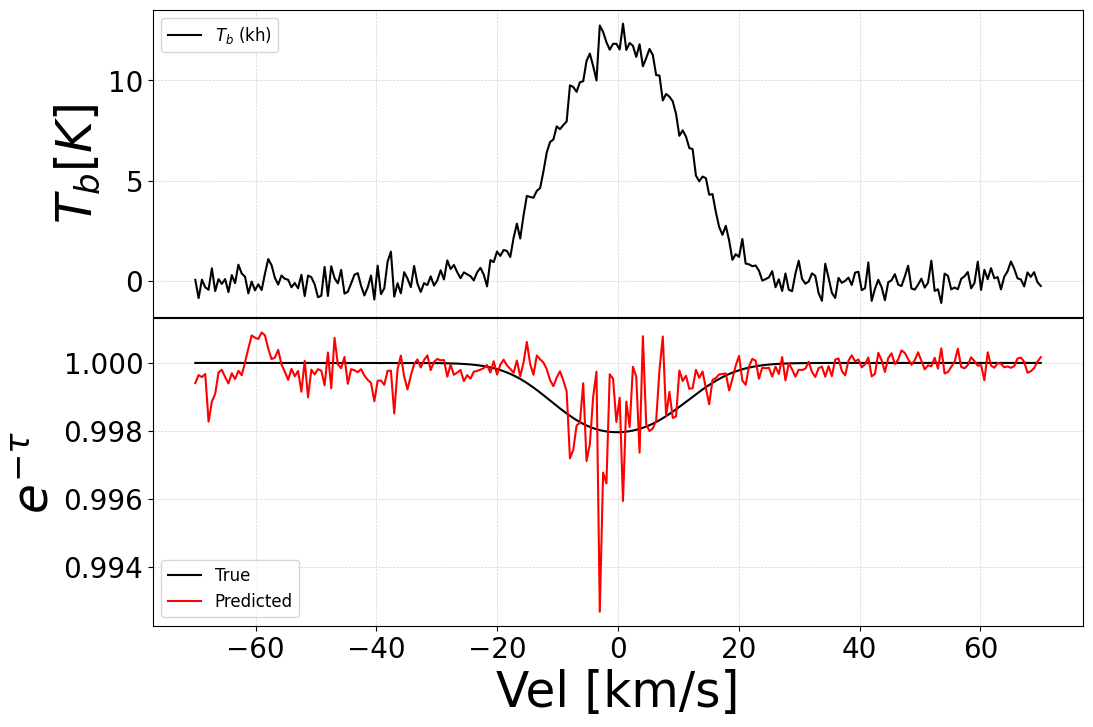

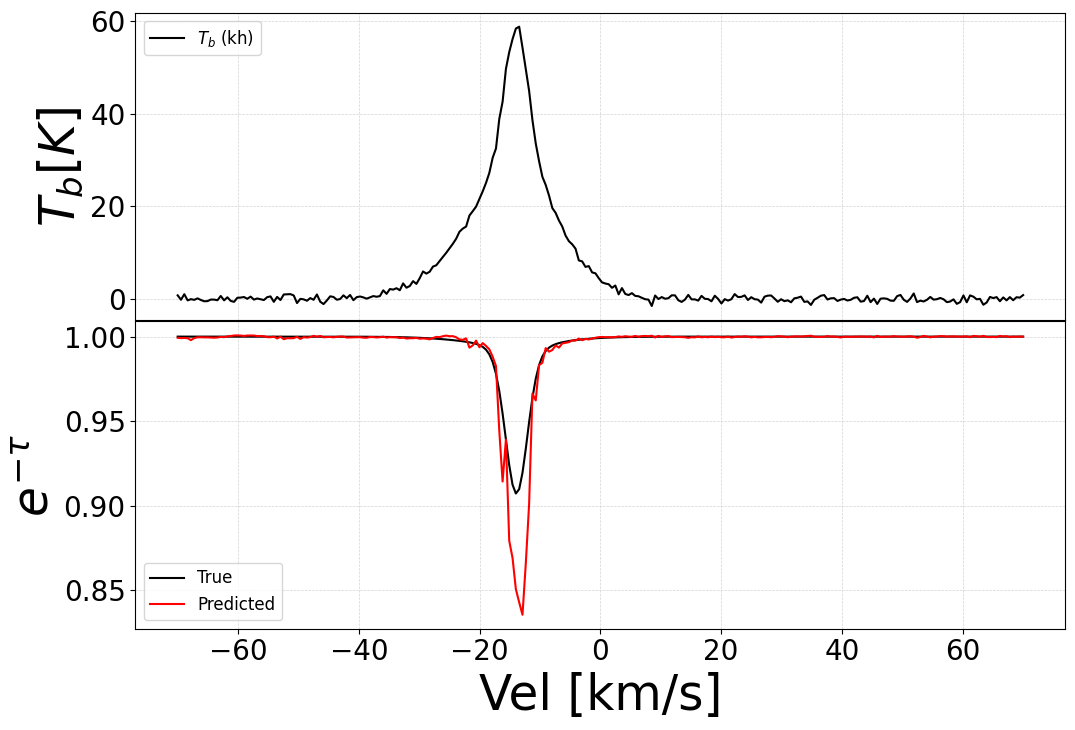

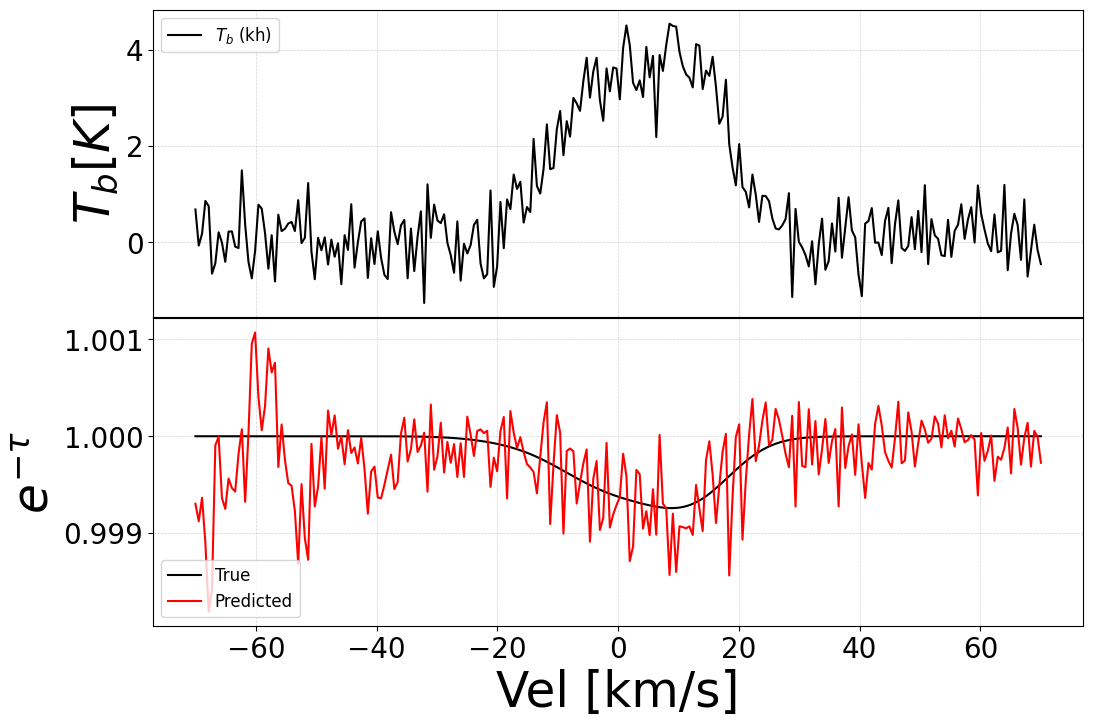

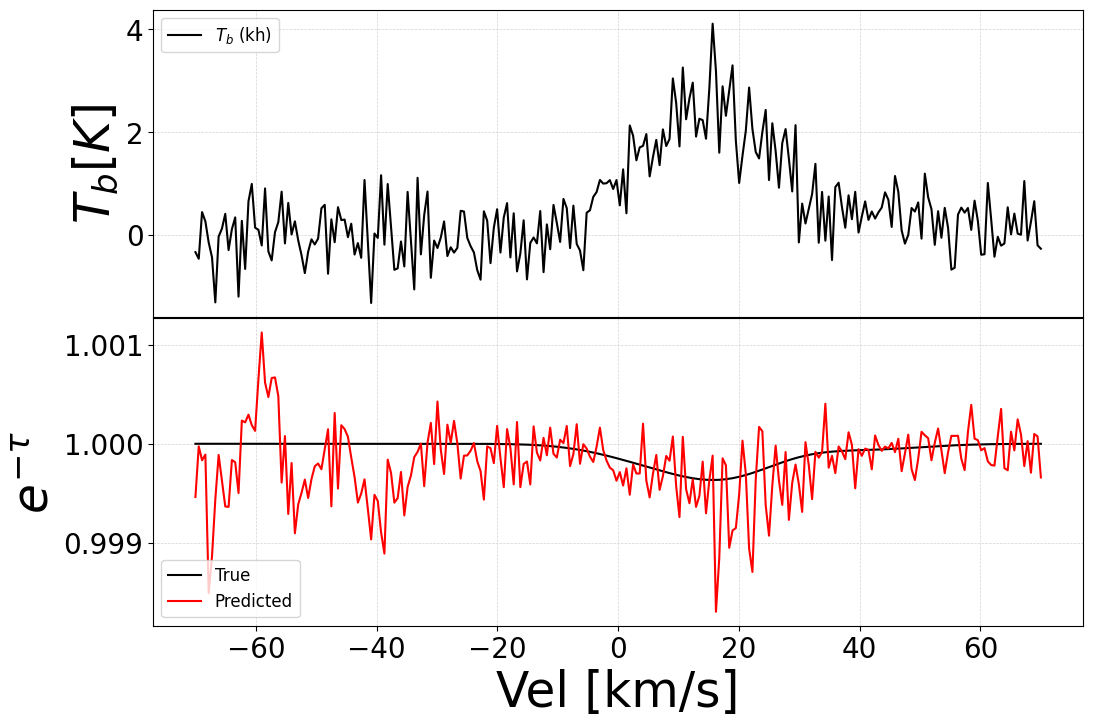

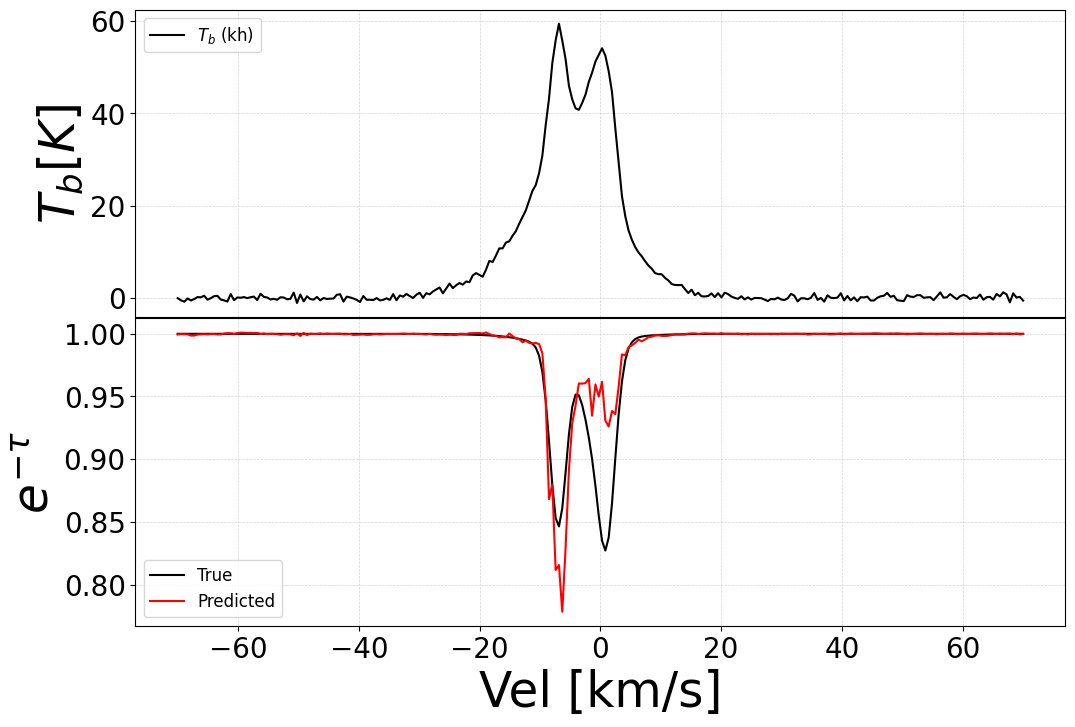

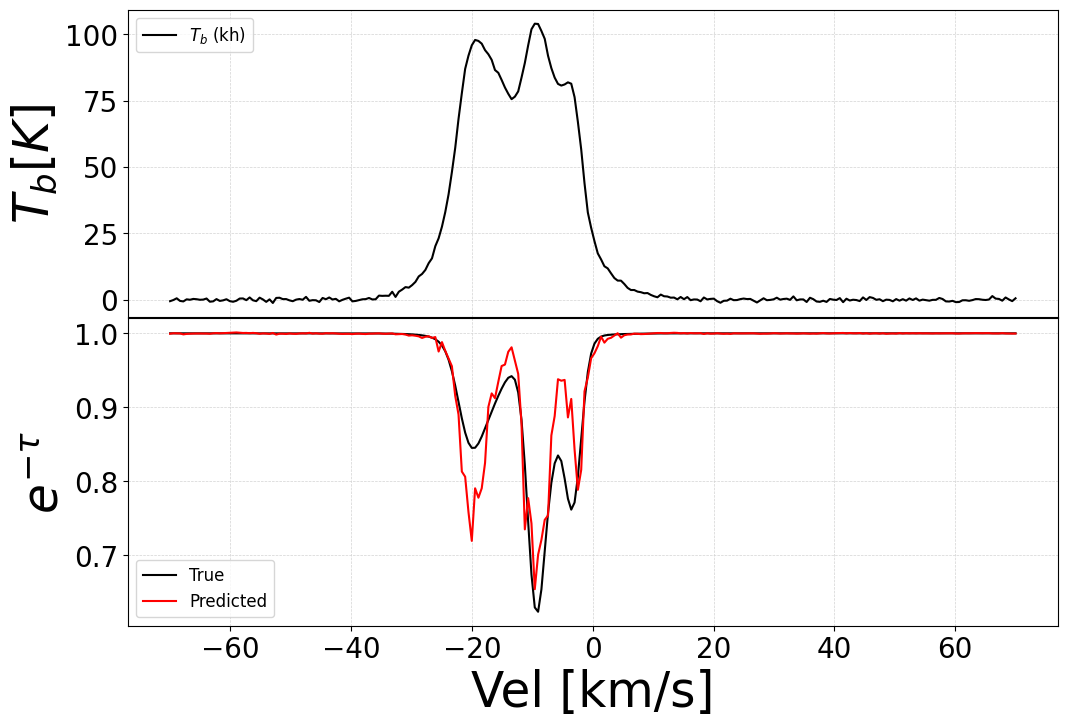

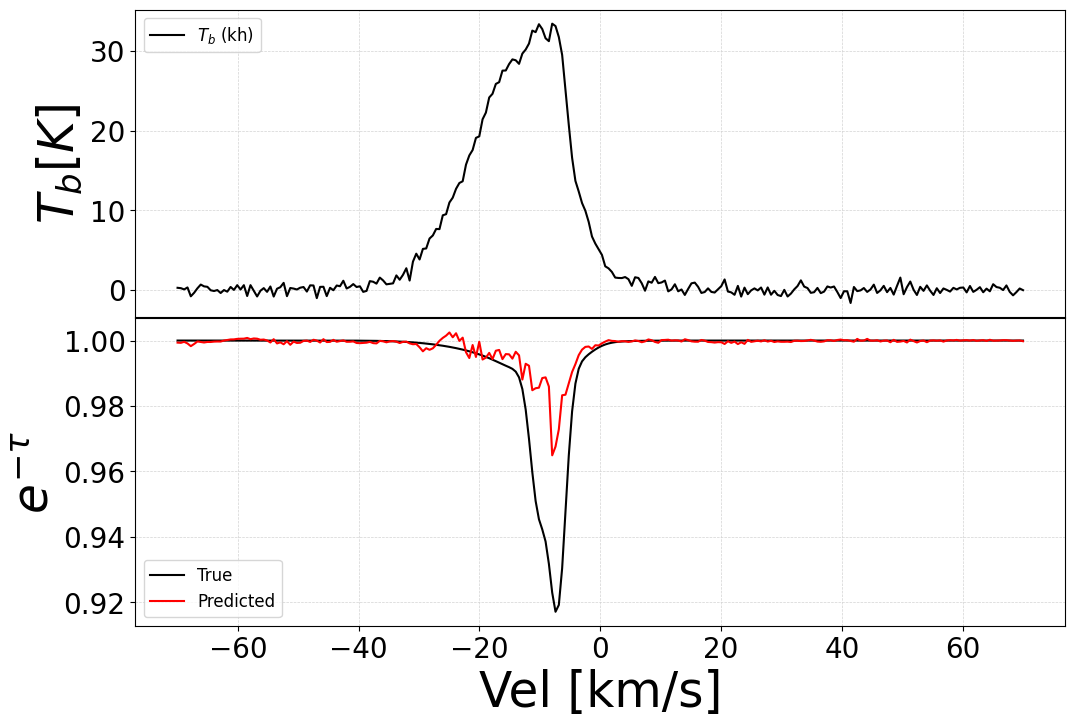

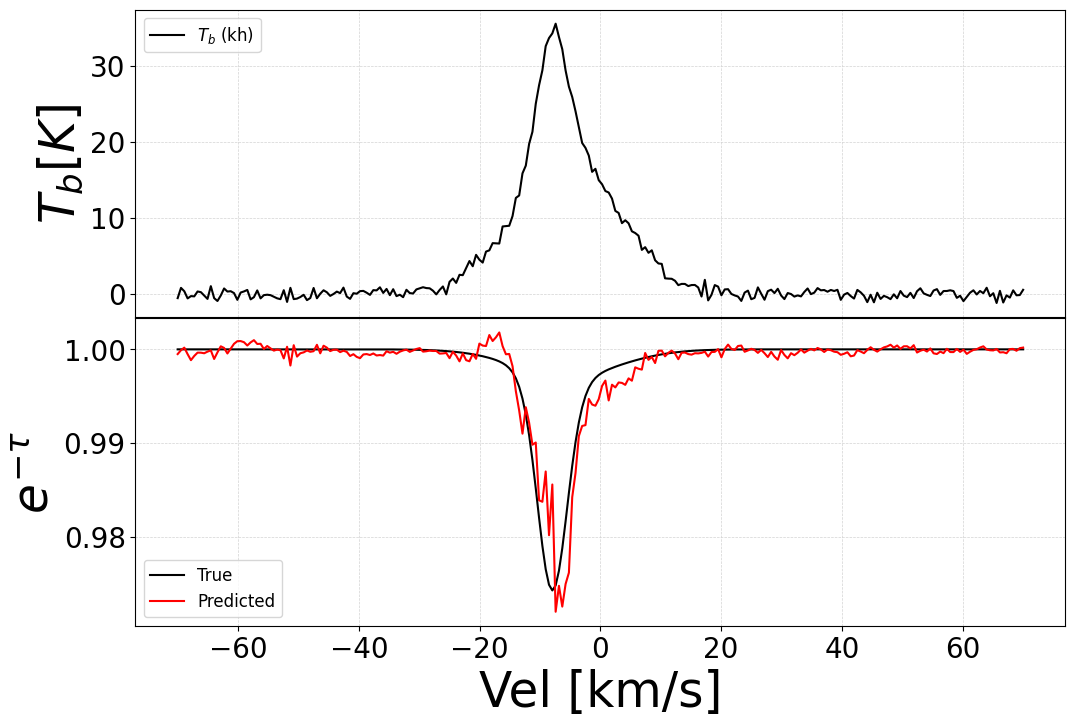

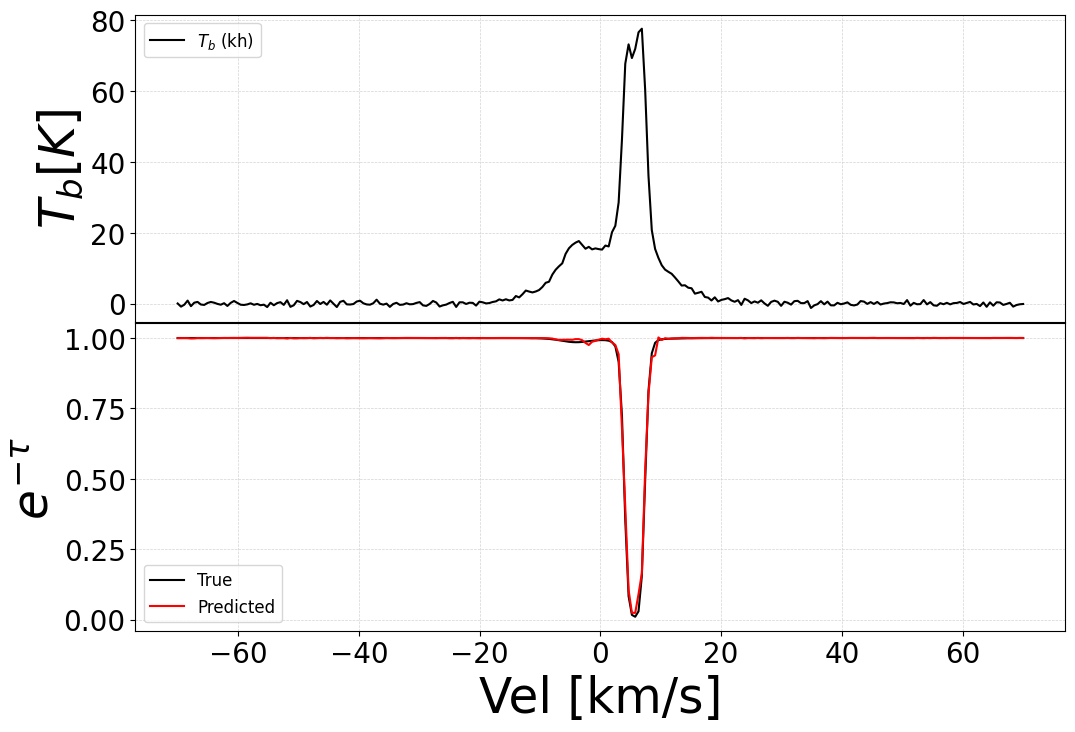

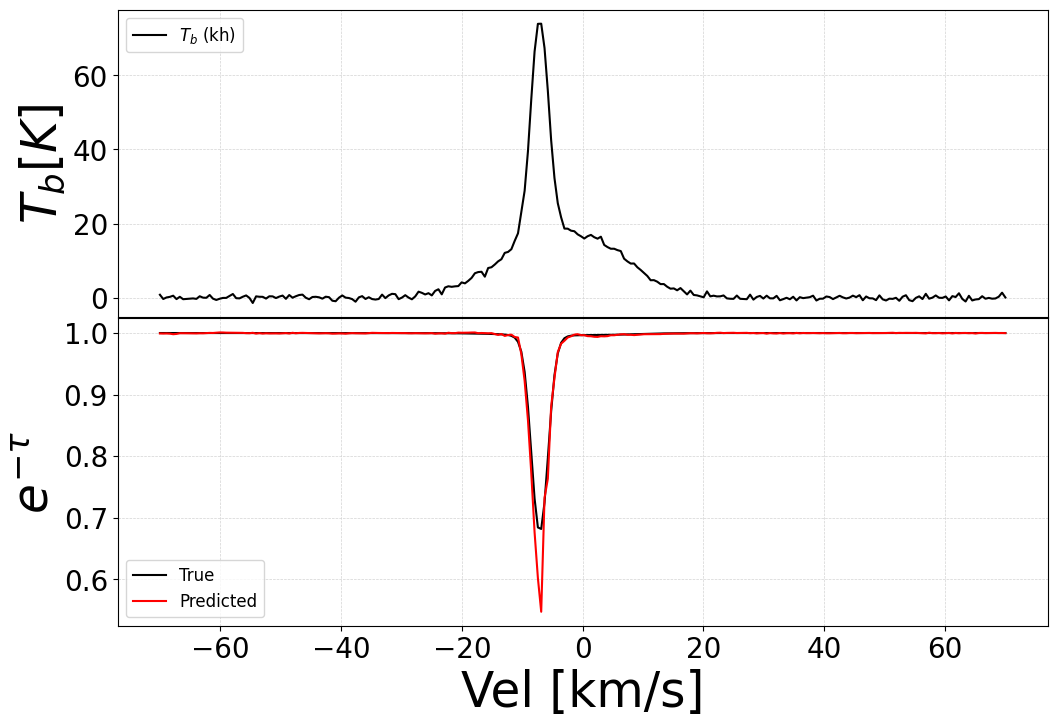

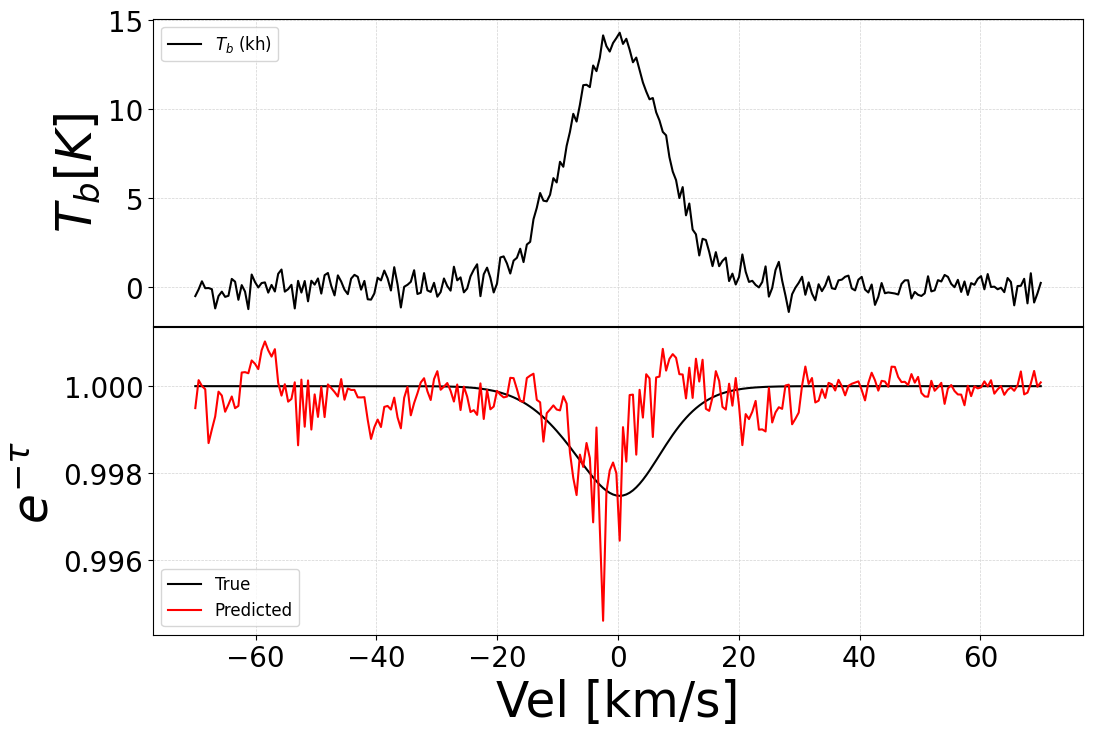

In [52]:
for i in [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,20000,30000]:
    hiep_plot(i)